In [22]:
!pip install scikit-learn
!pip install scikit-learn matplotlib
!pip install seaborn


In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from data_source import DataSource
from extractor import Extractor
from sklearn.cluster import KMeans

# Extraction des données

In [17]:
source = DataSource("./../data.json")
dataframe_list = source.filter([["WC"], ["M"], [], [], ["F", "F1", "Q"]], "include", None)
extractor = Extractor(dataframe_list)
athletes = extractor.all_athletes()
athletes_data = {}
for athlete in athletes:
    athletes_data[athlete] = extractor.extract_athlete(athlete)
    # print(athlete,":") # noqa: ERA001
    # print(f"   ski_points: {athletes_data[athlete]["ski_points"]["raw"]["mean"]}")  # noqa: ERA001
    # print(f"   air_points: {athletes_data[athlete]["air_points"]["raw"]["mean"]}") # noqa: ERA001
    # print(f"   time_points: {athletes_data[athlete]["time_points"]["raw"]["mean"]}") # noqa: ERA001

len(athletes_data)

126

# Création d'un DataFrame utilisable pour le clustering

In [18]:
data = []
athlete_names = []

for athlete, attributes in athletes_data.items():
    athlete_names.append(athlete)
    data.append([attributes["ski_points"]["raw"]["mean"], attributes["air_points"]["raw"]["mean"], attributes["time_points"]["raw"]["mean"]])

df_athletes = pd.DataFrame(data, columns=["ski_points", "air_points", "time_points"], index=athlete_names)

df_athletes

,ski_points,air_points,time_points
YEMELYANOV Maxim,22.340000,9.720000,12.110000
PASCARELLA Paolo,27.709091,10.198182,10.907273
SUMMERS Brodie,47.635714,13.974286,15.109286
MICKEL Charlie,35.750000,13.606250,12.663750
ANDREEV Nikita,48.350000,14.365000,15.382500
...,...,...,...
DONG Mingwei,36.320000,9.676000,11.530000
JUNG Daeyoon,35.370833,12.463333,15.256667
MATSUDA So,40.368750,13.263125,14.467500
VIEL Julien,43.116000,12.746800,15.578000


# Elbow Method (méthode du coude)
Utilisée pour calculer le meilleur K

Text(0, 0.5, 'Cour du modele (Inertia)')

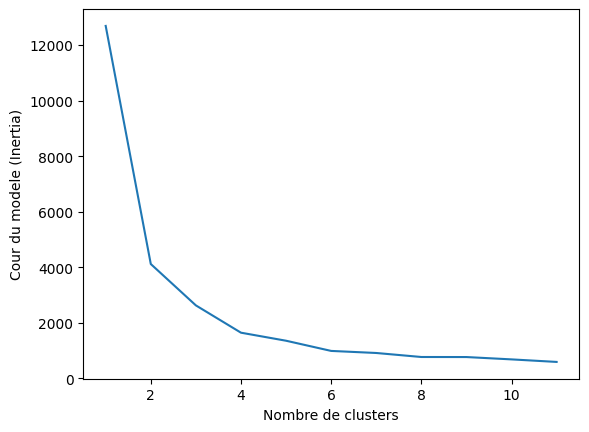

In [19]:
inertia = []
K_range = range(1, 12)
for k in K_range:
    model = KMeans(n_clusters=k).fit(df_athletes)
    inertia.append(model.inertia_)

plt.plot(K_range, inertia)
plt.xlabel("Nombre de clusters")
plt.ylabel("Cour du modele (Inertia)")

# Clustering sur les données

In [20]:
model = KMeans(n_clusters=3)
model.fit(df_athletes)
model.predict(df_athletes)
model.cluster_centers_

array([[43.16867597, 13.00955437, 15.29523742],
       [19.33685473,  8.63723542, 11.91970316],
       [34.67837116, 10.51387734, 13.51381971]])

/home/julian/Documents/ENSIMAG/3A/Open-Data/ENSIMAG3A-COD-IA/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/julian/Documents/ENSIMAG/3A/Open-Data/ENSIMAG3A-COD-IA/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/julian/Documents/ENSIMAG/3A/Open-Data/ENSIMAG3A-COD-IA/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/julian/Documents/ENSIMAG/3A/Open-Data/ENSIMAG3A-COD-IA/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/home/julian/Documents/ENSIMAG/3A/Open-Data/ENSIMAG3A-COD-IA/.venv/lib/python3.12

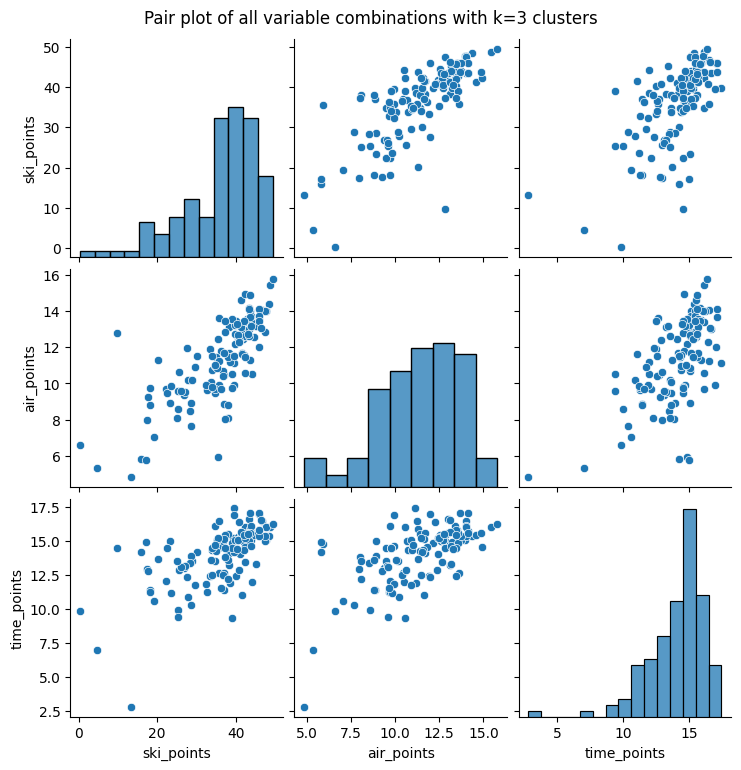

In [21]:
sns.pairplot(df_athletes, palette="Set1")

# Afficher le plot
plt.suptitle("Pair plot of all variable combinations with k=3 clusters", y=1.02)  # Titre général
plt.show()